<a href="https://colab.research.google.com/github/mhkarimid/Bioox-/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.5"
export JULIA_PKG_PRECOMPILE_AUTO=0
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  echo "Installing PyCall.jl..."
  julia -e 'using Pkg; Pkg.add("PyCall"); Pkg.build("PyCall")'
  julia -e 'println("Success")'

fi

Installing Julia 1.8.5 on the current Colab Runtime...
2023-03-18 01:25:39 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz [130873886/130873886] -> "/tmp/julia.tar.gz" [1]
Installing PyCall.jl...
  Installing known registries into `~/.julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Preferences ───── v1.3.0
   Installed VersionParsing ── v1.3.0
   Installed Conda ─────────── v1.8.0
   Installed JSON ──────────── v0.21.3
   Installed MacroTools ────── v0.5.10
   Installed Parsers ───────── v2.5.8
   Installed PyCall ────────── v1.95.1
   Installed SnoopPrecompile ─ v1.0.3
    Updating `~/.julia/environments/v1.8/Project.toml`
  [438e738f] + PyCall v1.95.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [8f4d0f93] + Conda v1.8.0
  [682c06a0] + JSON v0.21.3
  [1914dd2f] + MacroTools v0.5.10
  [69de0a69] + Parsers v2.5.8
  [21216c6a] + Preferences v1.3.0
  [438e738f] + 

In [3]:
%pip install -Uq pysr pytorch_lightning
from julia import Julia

julia = Julia(compiled_modules=False, threads='auto')
from julia import Main
from julia.tools import redirect_output_streams

redirect_output_streams()
import pysr

# We don't precompile in colab because compiled modules are incompatible static Python libraries:
pysr.install(precompile=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.8 MB/s eta 0:00:00
Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 20.04.5 LTS
  uname: Linux 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  2200 MHz    

[ Info: Julia version info
[ Info: Julia executable: /usr/local/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /usr/bin/python3
│     libpython: /usr/lib/x86_64-linux-gnu/libpython3.9.so.1.0
│ Python:
│     python: /usr/bin/python3
└     libpython: 
     Cloning git-repo `https://github.com/MilesCranmer/SymbolicRegression.jl`
     Cloning git-repo `https://github.com/JuliaParallel/ClusterManagers.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed RealDot ────────────────────────── v0.1.0
   Installed IRTools ────────────────────────── v0.4.8
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed DynamicPolynomials ─────────────── v0.4.6
   Installed GPUArraysCore ──────────────────── v0.1.4
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed IrrationalConstants ────────────── v0.2.2
   Installed AutoH

In [4]:
import sympy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/mhkarimid/Data/main/newdata.csv', 
               names=['Time (min)', 'Gold grade (g/ton)', 'Pyrite content (wt.%)',
               'Ore content (wt.%)', 'pH', 'ORP (mV)', 'D-Gal (wt.%)',
               'D-Suc (wt.%)', 'D-FrU (wt.%)', 'Ferric (g/lit)', 'Pyrite dissolution (%)'])
df.head()

,Time (min),Gold grade (g/ton),Pyrite content (wt.%),Ore content (wt.%),pH,ORP (mV),D-Gal (wt.%),D-Suc (wt.%),D-FrU (wt.%),Ferric (g/lit),Pyrite dissolution (%)
0,-0.500000,0.5,0.5,-0.444444,-0.191734,-0.460602,-0.155844,-0.155844,-0.155844,-0.177262,-0.339150
1,-0.456522,0.5,0.5,-0.444444,-0.201303,-0.443605,-0.155844,-0.155844,-0.155844,-0.161934,-0.323117
2,-0.413043,0.5,0.5,-0.444444,-0.244366,-0.432274,-0.155844,-0.155844,-0.155844,-0.165186,-0.327591
3,-0.369565,0.5,0.5,-0.444444,-0.273074,-0.304795,-0.155844,-0.155844,-0.155844,-0.131744,-0.278188
4,-0.326087,0.5,0.5,-0.444444,-0.225227,-0.214143,-0.155844,-0.155844,-0.155844,-0.118739,-0.251342


In [6]:

gg=np.sqrt(df['Time (min)']**2+
            df['Gold grade (g/ton)']**2+
            df['Pyrite content (wt.%)']**2+
            df['Ore content (wt.%)']**2+
            df['pH']**2+\
            df['ORP (mV)']**2+
            df['D-Gal (wt.%)']**2+
            df['D-Suc (wt.%)']**2+
            df['D-FrU (wt.%)']**2)
    
df['Time (min)']=df['Time (min)']/gg
df['Gold grade (g/ton)']=df['Gold grade (g/ton)']/gg
df['Pyrite content (wt.%)']=df['Pyrite content (wt.%)']/gg
df['Ore content (wt.%)']=df['Ore content (wt.%)']/gg
df['pH']=df['pH']/gg
df['ORP (mV)']=df['ORP (mV)']/gg
df['D-Gal (wt.%)']=df['D-Gal (wt.%)']/gg
df['D-Suc (wt.%)']=df['D-Suc (wt.%)']/gg
df['D-FrU (wt.%)']=df['D-FrU (wt.%)']/gg

def sig(x):
 return 1/(1 + np.exp(-x))
 

df=sig(df)
df.head()

,Time (min),Gold grade (g/ton),Pyrite content (wt.%),Ore content (wt.%),pH,ORP (mV),D-Gal (wt.%),D-Suc (wt.%),D-FrU (wt.%),Ferric (g/lit),Pyrite dissolution (%)
0,0.390836,0.609164,0.609164,0.402637,0.457557,0.399193,0.465473,0.465473,0.465473,0.455800,0.416016
1,0.397959,0.611448,0.611448,0.400586,0.454491,0.400769,0.464729,0.464729,0.464729,0.459605,0.419916
2,0.406363,0.612734,0.612734,0.399431,0.444174,0.402113,0.464309,0.464309,0.464309,0.458797,0.418827
3,0.411799,0.618307,0.618307,0.394420,0.434517,0.427013,0.462484,0.462484,0.462484,0.467112,0.430898
4,0.418112,0.624058,0.624058,0.389243,0.443173,0.445947,0.460590,0.460590,0.460590,0.470350,0.437493


In [11]:
XX=df.drop(['Gold grade (g/ton)','Ferric (g/lit)','Pyrite dissolution (%)'], axis=1)
yy=df['Pyrite dissolution (%)']

Rtr=[]
RMSEtr=[]

Rte=[]
RMSEte=[]

MODEL=[]

for i in range(1,19):
    X_tr, X_te, y_tr, y_te = train_test_split(XX, yy, test_size=0.05*i)
    X = X_tr.values.tolist()
    y = y_tr.transpose().values.tolist()
    Xte = X_te.values.tolist()
    yte = y_te.transpose().values.tolist()
    default_pysr_params = dict(
        populations=10,
        model_selection="accuracy",
        loss="L1DistLoss()",
        maxsize=30,
        precision=16,
    )
    model = PySRRegressor( 
        niterations=30,
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["exp","sinh", "cosh"],
        **default_pysr_params
    )
    model.fit(X, y)

    MODEL.append(model)
    y2=model.predict(Xte)
    
    dk=pd.DataFrame(data=[yte,y2])
    d=dk.transpose().corr()[1]
    SS=d.squeeze()[0]
    Rte.append(SS)
    rmse=(mean_squared_error(yte, y2))
    RMSEte.append(rmse)  
    
    y3=model.predict(X)
    dk=pd.DataFrame(data=[y,y3])
    d=dk.transpose().corr()[1]
    SS=d.squeeze()[0]
    Rtr.append(SS)
    rmse=(mean_squared_error(y, y3))
    RMSEtr.append(rmse)
    
    


/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 2.870e+02
Head worker occupation: 0.0%
Progress: 1 / 300 total iterations (0.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.524e-02  7.311e-01  x4

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.820e+03
Head worker occupation: 0.3%
Progress: 11 / 300 total iterations (3.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.524e-02  7.311e-01  x4
3           2.502e-02  4.168e-03  (x4 / 1.004)
10          2.457e-02  2.605e-03  (x4 * exp((sinh(-0.3743) * x4) * sinh(0.07324)))
12          2.293e-02  3.436e-02  (x4 * exp((-0.3743 * x4) * ((x4 + -0.3743) - 0.07324)))
13          2.290e-02  1.466e-03  (x4 * exp((sinh(-0.3743) * x4) * ((x4 + -0.3743) - 0.07324)))
14          2.238e-02  2.272e-02  (x4 * exp(((-0.3743 / x1) * x4) * ((x4 + -0.3743) - 0.07324)))
18          2.228e-02  1.224e-03  (x4 * exp(((-0

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.060e+03
Head worker occupation: 0.1%
Progress: 3 / 300 total iterations (1.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.522e-02  7.375e-01  x4
11          2.472e-02  2.022e-03  (((0.3716 / cosh(sinh(x4) + x2)) + 0.7803) * x4)
13          2.220e-02  5.382e-02  (((0.3716 / cosh(x4 + (x4 / x1))) + 0.7803) * sinh(x4))
18          2.203e-02  1.470e-03  ((sinh(sinh(0.3716) / ((x0 + sinh(sinh(x4) + x4)) + 0.3716)) + 0.7695) * sinh(x4))
21          2.132e-02  1.109e-02  (((sinh(0.3716) / ((x4 + sinh((sinh(x4) + (x4 - x1)) + x4)) + x1)) + 0.7695) * sinh(x4))
22          2.074e-02  2.772e-02  (((sinh(sinh(0.3716)) / ((x4 + sinh((sinh(x4) + (x4 - x1)) + x4)) + 0.4158)) + 0.7695) * sinh(x4))
24          1.971e-02  2.529e-02  (((sinh(sinh(0.3716)) / ((x4 + sinh((sinh(x4) + ((x4 - x1) / x1)) + x4)) + x1)) + 0.7695) * sinh(x4))

Press 'q' and then <enter> to stop execution early.

Cycles per second

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.030e+03
Head worker occupation: 19.0%
Progress: 3 / 300 total iterations (1.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.525e-02  7.369e-01  x4
3           2.492e-02  6.636e-03  (x4 * 0.988)
5           2.490e-02  2.442e-04  (x4 + (-0.010796 * x4))
7           2.489e-02  2.442e-04  (x4 + (sinh(-0.010796) * sinh(x4)))
9           2.487e-02  2.442e-04  (x4 + ((sinh(-0.010796) * 0.937) * sinh(x4)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.840e+03
Head worker occupation: 0.5%
Progress: 17 / 300 total iterations (5.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.525e-02  7.369e-01  x4
3           2.490e-02  6.883e-03  (x4 / 1.012)
5           2.487e-02  7.330e-04  (x4 + (-0.010796 * x0))
6           2.486e-02  4.884e-04  (x4 + (-0.010796 * sinh(x0)))
7           2.481e-02  1.955e-03  (x

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.200e+03
Head worker occupation: 0.1%
Progress: 9 / 300 total iterations (3.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.490e-02  7.497e-01  x4
3           2.461e-02  5.894e-03  (x4 / 1.007)
5           2.191e-02  5.819e-02  ((x4 + 0.06247) * 0.8794)
29          2.159e-02  6.149e-04  exp((((exp(sinh(x1)) * x0) / cosh(sinh(cosh((((-2.004 + 1.328) / x4) / cosh(x0)) * sinh(0.7495))) + 0.447)) / 0.734) - sinh(sinh(0.734)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 3.170e+03
Head worker occupation: 0.2%
Progress: 18 / 300 total iterations (6.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.490e-02  7.497e-01  x4
3           2.461e-02  5.894e-03  (x4 / 1.007)
5           2.191e-02  5.819e-02  ((x4 + 0.06247) * 0.8794)
9           2.139e-02  5.929e-03  ((((x4 + 0.06247) * 0.8794) + 0.06247) * 

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 2.100e+03
Head worker occupation: 0.1%
Progress: 7 / 300 total iterations (2.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.528e-02  7.246e-01  x4
3           2.499e-02  5.647e-03  (x4 * 0.985)
10          2.490e-02  5.591e-04  (x4 + ((exp(-0.02235) * x4) * (x3 * -0.02235)))
12          2.461e-02  5.894e-03  (x4 + (-0.02235 * (-0.02235 * (x5 - exp(cosh(exp(x4)))))))
17          2.318e-02  1.197e-02  ((exp(((x4 - (exp(x7 - x7) - x5)) / x5) * x4) - x5) - 0.005234)
19          2.219e-02  2.196e-02  (exp(sinh(((x4 - (exp(sinh(x7 - x7)) - x5)) * 0.8477) / x1) * x1) - x5)
24          2.182e-02  3.348e-03  ((exp((((x4 - (exp((x7 - x7) * cosh(sinh(x5))) - x5)) * 0.8477) / sinh(x1)) * x1) - x5) - 0.010414)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.460e+03
Head worker occupation: 0.2%
Progress: 15 / 300 total iterations (5.000%)
Hall of Fame:
----------------------

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 9.520e+02
Head worker occupation: 0.1%
Progress: 3 / 300 total iterations (1.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.525e-02  7.415e-01  x4
4           2.515e-02  1.468e-03  (sinh(0.88) * x4)
7           2.478e-02  4.919e-03  (x4 + ((-0.006054 * x4) / x1))
10          2.315e-02  2.273e-02  (sinh((-0.1742 * (-0.5337 + x0)) + 0.88) * x4)
11          2.275e-02  1.724e-02  (sinh((-0.1742 * (-0.5337 + sinh(x0))) + 0.88) * x4)
12          2.232e-02  1.873e-02  (sinh(sinh(-0.1742 * (-0.5337 + sinh(x4))) + 0.88) * x4)
14          2.196e-02  8.370e-03  (sinh(sinh(sinh(-0.1742 * (-0.5337 + sinh(sinh(x4))))) + 0.88) * x4)
16          2.158e-02  8.867e-03  (sinh((sinh(sinh(sinh((sinh(x4) + -0.5337) * -0.1742))) / x4) + 0.88) * x4)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.270e+03
Head worker occupation: 0.3%
Progress: 13 / 300 total iterations (4.333%)
Hall of

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.920e+03
Head worker occupation: 0.4%
Progress: 6 / 300 total iterations (2.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.557e-02  7.358e-01  x4
3           2.534e-02  4.414e-03  (x4 * 0.99)
9           2.521e-02  8.976e-04  (x4 + ((x2 - x0) * (-0.1478 + 0.1786)))
11          2.505e-02  2.938e-03  (x4 + ((x0 * -0.266) * (-0.3386 * (x0 * -0.266))))
13          2.502e-02  4.885e-04  (x4 + ((x0 * -0.266) * (-0.3386 * ((x0 * -0.266) * x4))))
16          2.493e-02  1.141e-03  (x4 + ((x0 * -0.266) * ((-0.3386 / 1.725) * ((x0 * -0.266) * exp(x4)))))
17          2.490e-02  1.466e-03  (x4 + ((x0 * -0.266) * (-0.3386 * (((x0 - (-0.9946 + x5)) * -0.266) * x0))))
23          2.464e-02  1.718e-03  (x4 + ((x0 * (((x0 - -0.9946) * -0.266) * x0)) * (-0.3386 * (((x0 - (-0.9946 + x5)) * -0.266) * x0))))
24          2.454e-02  4.404e-03  (((((cosh(-0.4714) / (sinh(0.4473) * -0.901)) / sinh(0.2402)) - (((

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.980e+03
Head worker occupation: 0.1%
Progress: 6 / 300 total iterations (2.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.521e-02  7.399e-01  x4
3           2.492e-02  5.894e-03  (x4 * 0.9917)
8           2.370e-02  1.001e-02  exp(sinh(x4 - cosh(x4 - 1.054)))
9           2.367e-02  1.466e-03  exp(sinh(sinh(x4) - cosh(x3 / 0.8438)))
12          2.187e-02  2.641e-02  exp(sinh(x4 - cosh(x4 - cosh(sinh(x4 / 1.572)))))
14          2.094e-02  2.170e-02  (x4 - (0.0827 * (x4 - (((0.0827 + 0.04578) / x4) * exp(x1)))))
16          2.069e-02  5.894e-03  (x4 - (0.0827 * (sinh(x4) - sinh(((0.0827 + 0.04578) / x4) * exp(x1)))))
18          1.997e-02  1.764e-02  (x4 - (0.0827 * (((x4 - (((0.0827 + 0.04578) / x4) * exp(x1))) / x0) + -0.06714)))
21          1.974e-02  3.765e-03  (x4 - (0.0827 * (((sinh(x4) - (((0.0827 + 0.04578) / x4) * exp(x1))) / (x0 - -0.1636)) + -0.06714)))
23          1.971e-02  7

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.880e+03
Head worker occupation: 0.2%
Progress: 11 / 300 total iterations (3.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.553e-02  7.191e-01  x4
3           2.510e-02  8.370e-03  (x4 * 0.9893)
6           2.225e-02  4.026e-02  sinh((x4 - -0.3467) * 0.5605)
7           2.139e-02  3.934e-02  sinh((sinh(x4) - -0.3337) * 0.5605)
19          2.061e-02  3.067e-03  sinh(sinh(((sinh(exp(sinh(-0.813 * 0.9644))) - 0.0169) * sinh(-0.07416 + sinh(sinh(x4)))) - -0.2544))
28          2.046e-02  8.168e-04  sinh(sinh(sinh((sinh(exp(-0.813 * 0.9644)) - ((x7 / (x3 + 2.1)) * -0.2646)) * sinh(sinh(-0.07416) + (-0.07416 + sinh(x4)))) - sinh(-0.2544)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 3.490e+03
Head worker occupation: 0.4%
Progress: 20 / 300 total iterations (6.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1  

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.580e+03
Head worker occupation: 0.2%
Progress: 11 / 300 total iterations (3.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.553e-02  7.121e-01  x4
3           2.492e-02  1.211e-02  (x4 * 0.987)
5           2.219e-02  5.792e-02  (cosh(sinh(x4)) + -0.647)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.790e+03
Head worker occupation: 0.5%
Progress: 28 / 300 total iterations (9.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.553e-02  7.121e-01  x4
3           2.492e-02  1.211e-02  (x4 * 0.987)
5           2.219e-02  5.792e-02  (cosh(sinh(x4)) + -0.647)
11          2.196e-02  1.718e-03  ((((x4 - x6) * x6) * (0.333 + 1.326)) + x6)
12          2.092e-02  4.852e-02  ((((x4 - x6) * 0.4465) * (sinh(x6) + 1.331)) + x6)
14          2.086e-02  1.467e-03  (sinh(((x4 - x6) * sinh(0.4326)) * (sinh(x6) + 1.

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.000e+03
Head worker occupation: 0.6%
Progress: 9 / 300 total iterations (3.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.531e-02  7.252e-01  x4
3           2.524e-02  1.467e-03  (x4 + -0.000325)
12          2.402e-02  5.505e-03  (sinh(((sinh(sinh(x4)) * 1.318) * x4) * 0.376) + 0.363)
25          2.248e-02  5.085e-03  (-1.103 / (((sinh((cosh(0.8887) - (x4 + x4)) + x3) + cosh(-0.7773)) / -0.747) - (((x1 * sinh(0.02747)) - x3) + -0.4138)))
26          2.019e-02  1.076e-01  (-1.103 / (((((cosh(0.8887) - (x4 + x4)) + x3) + cosh(0.8887)) / -0.747) - ((((-0.2089 - x1) * x4) * cosh(-0.5483)) - x3)))
29          1.962e-02  9.409e-03  (-1.103 / (((((cosh(0.8887) - (x4 + x4)) + x3) + cosh(0.8887)) / -0.747) - (((((-0.2089 - x1) * x4) * cosh(-0.5483)) - x3) + sinh(0.02747))))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.650e+03
Head worker occupation: 0.4%
Progress: 

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.610e+03
Head worker occupation: 1.4%
Progress: 10 / 300 total iterations (3.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.573e-02  7.229e-01  x4
3           2.541e-02  6.388e-03  (x4 / 1.01)
8           2.481e-02  4.743e-03  exp(x4 - cosh(x4 - cosh(x2)))
20          2.118e-02  1.320e-02  sinh(exp(sinh(((1.218 - (x4 + sinh(x4))) * (sinh((-0.516 - x3) / 1.027) / 2.281)) + -0.596)))
21          2.077e-02  1.972e-02  sinh(sinh(exp(sinh(sinh((1.218 - (x4 + x4)) * ((sinh(-0.516 - x5) * 1.027) / 2.281)) + -0.596))))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.410e+03
Head worker occupation: 0.7%
Progress: 26 / 300 total iterations (8.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.573e-02  7.229e-01  x4
3           2.541e-02  6.388e-03  (x4 / 1.01)
5           2.238e-02  6.343e-02  exp(sinh(x

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 7.880e+03
Head worker occupation: 0.4%
Progress: 23 / 300 total iterations (7.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.499e-02  7.402e-01  x4
3           2.449e-02  1.011e-02  (x4 * 0.9883)
7           2.232e-02  2.313e-02  (x4 + ((x4 - x1) * -0.1771))
9           2.199e-02  7.626e-03  (x4 + (((x4 - -0.04068) - x1) * -0.1771))
10          2.100e-02  4.596e-02  ((x4 * cosh((x4 - 0.8833) * 1.157)) * 0.9043)
16          2.065e-02  2.790e-03  (x4 + ((((((sinh(x4) - x1) / x1) * x2) * -0.588) / 2.576) * 0.5815))
17          1.981e-02  4.137e-02  (0.374 - ((sinh(x4 - ((x0 + sinh(x4)) / -1.876)) / -2.785) * (x4 * x4)))
21          1.974e-02  7.335e-04  (0.374 - (sinh(sinh(x4 - ((x0 + (sinh(x4) + -0.1022)) / -1.876)) / -2.785) * (x4 * sinh(x4))))
22          1.970e-02  2.444e-03  (0.374 - ((sinh(x4 - ((x0 + sinh(sinh(x4) + sinh(-0.1022))) / -1.876)) / -2.785) * (x4 * sinh(x4))))

Press 'q' 

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 7.780e+03
Head worker occupation: 0.5%
Progress: 22 / 300 total iterations (7.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.513e-02  7.623e-01  x4
3           2.487e-02  5.153e-03  (x4 * 0.9893)
7           2.225e-02  2.786e-02  sinh(x4 / (cosh(x4) * 0.9185))
8           2.203e-02  9.814e-03  (sinh(x4) / (cosh(sinh(x4)) * 0.9185))
10          2.036e-02  3.961e-02  ((x4 - 0.06464) + sinh((0.01497 / x4) / x0))
14          2.017e-02  2.207e-03  ((x4 - 0.06464) + sinh(sinh(sinh(sinh(0.01497 / x4) / sinh(x0)))))
26          1.970e-02  1.976e-03  sinh(sinh(sinh(exp(sinh(exp((sinh((x1 * sinh(x4)) + (sinh(sinh(x4)) / 1.501)) - -0.2073) + -1.394) * sinh(x4)) + -1.144))))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 7.550e+03
Head worker occupation: 0.8%
Progress: 43 / 300 total iterations (14.333%)
Hall of Fame:
-----------------------------------------
Complexity  Lo

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 6.980e+03
Head worker occupation: 0.6%
Progress: 20 / 300 total iterations (6.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.550e-02  7.003e-01  x4
3           2.486e-02  1.261e-02  (x4 * 0.9873)
6           2.281e-02  2.853e-02  ((sinh(x4) + 0.4312) * 0.522)
7           2.107e-02  7.923e-02  ((sinh(sinh(x4)) + 0.2012) * 0.663)
8           2.065e-02  2.072e-02  ((sinh(exp(sinh(x4))) + 0.3555) * 0.1655)
9           2.048e-02  8.335e-03  ((sinh(0.3555) + sinh(sinh(sinh(x4)))) * 0.522)
10          2.031e-02  8.335e-03  ((sinh(sinh(0.3555)) + sinh(sinh(sinh(x4)))) * 0.522)
18          1.984e-02  2.965e-03  (x5 - ((x5 - x4) * (x6 - (((x5 * (sinh(0.05307) - x4)) - x4) * x5))))
19          1.974e-02  4.404e-03  (x5 - ((x5 - x4) * (x6 - (((sinh(x5) * (sinh(0.05307) - x4)) - x4) * x5))))
20          1.961e-02  6.859e-03  (x5 - ((x5 - x4) * (x7 - ((sinh(sinh(x5) * (sinh(0.05307) - x4)) - x6) * x5)

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 7.880e+03
Head worker occupation: 1.4%
Progress: 23 / 300 total iterations (7.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.415e-02  7.544e-01  x4
3           2.379e-02  7.626e-03  (x4 / 1.009)
5           2.016e-02  8.293e-02  ((x4 * 0.669) + 0.1628)
11          1.993e-02  1.882e-03  (x4 + (-0.03757 * ((x4 - 0.4827) / (x3 * x6))))
13          1.894e-02  2.554e-02  ((x4 * (0.2429 + (sinh(x4) * (0.2429 + 0.2429)))) + sinh(0.2429))
23          1.878e-02  8.335e-04  (x4 + (-0.03757 * ((sinh(((x4 - (sinh(x7) / (x4 / sinh(0.6396)))) * 0.958) / x7) + x2) * cosh(x0))))
27          1.871e-02  9.785e-04  (x4 + (-0.03757 * sinh(((sinh(x4 - (x6 / (x4 / 0.6396))) / (sinh(x6) / ((0.6396 / sinh(0.6396)) / x4))) + x2) * x3)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 8.890e+03
Head worker occupation: 1.0%
Progress: 51 / 300 total iterations (17.000%)
Hall of Fame:
------

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 8.910e+03
Head worker occupation: 1.1%
Progress: 25 / 300 total iterations (8.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.446e-02  7.648e-01  x4
3           2.406e-02  8.122e-03  (x4 * 0.991)
5           2.173e-02  5.111e-02  sinh(exp(-0.3726 / x4))
11          2.034e-02  1.102e-02  sinh(exp(sinh(sinh(x4) * sinh(x4)) - cosh(0.257)))
12          1.961e-02  3.680e-02  sinh(sinh(exp(sinh(x4 * x4) - cosh(0.1406 / x4))))
14          1.945e-02  3.922e-03  exp((sinh(sinh(x4)) * sinh(sinh(x4))) - cosh(sinh(x7) - x4))
15          1.901e-02  2.322e-02  sinh(exp((sinh(x4) * sinh(x4)) - cosh((x7 * sinh(x4)) - x7)))
16          1.889e-02  6.368e-03  sinh(exp(sinh(sinh(x4) * sinh(x4)) - cosh((x7 * sinh(x4)) - x7)))
18          1.851e-02  1.011e-02  sinh(exp((sinh(x4) * sinh(x4)) - cosh(((x7 * x4) * (x1 / x2)) - x7)))
19          1.834e-02  9.321e-03  sinh(exp(sinh(sinh(x4) * sinh(x4)) - cosh(((x7 *

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 8.770e+03
Head worker occupation: 1.2%
Progress: 25 / 300 total iterations (8.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.484e-02  7.417e-01  x4
3           2.390e-02  1.942e-02  (x4 * 0.984)
6           2.356e-02  4.754e-03  (x4 / cosh(0.0781 / x1))
8           2.155e-02  4.466e-02  sinh(((x4 * 0.828) * x4) - -0.2664)
15          2.095e-02  4.032e-03  (((((-0.03223 * -0.4587) - -0.4587) * 1.079) * sinh(sinh(sinh(x4)))) - sinh(-0.2036))
16          2.028e-02  3.276e-02  (((((sinh(x3) * -0.03223) - -0.4587) * 1.079) * sinh(sinh(sinh(sinh(x4))))) - -0.2036)
22          2.019e-02  7.340e-04  sinh(((((sinh(((x1 * x4) * sinh(x4)) * 0.1348) - -0.2096) - -0.2112) * 1.093) * sinh(sinh(x4))) - -0.2096)
26          1.970e-02  6.179e-03  (((((sinh(((sinh(sinh(x1)) + -0.4587) * 1.079) * sinh(cosh(sinh(x6)))) * 0.05423) - -0.4587) * 1.079) * sinh(sinh(sinh(x4)))) - -0.2051)
29          1.968e-02  

In [8]:
Results=pd.DataFrame(list(zip(RMSEtr, Rtr, RMSEte, Rte)), columns=['RMSE (training)', 
                                                               'Correlation factor (training)',
                                                              'RMSE (testing)', 
                                                               'Correlation factor (testing)'])

In [9]:
Results

,RMSE (training),Correlation factor (training),RMSE (testing),Correlation factor (testing)
0,0.000491,0.929603,0.000534,0.921149
1,0.000403,0.941890,0.000432,0.940572
2,0.000437,0.937308,0.000446,0.932700
3,0.000439,0.936744,0.000433,0.936749
4,0.000510,0.926749,0.000484,0.928408
5,0.000495,0.931612,0.000533,0.923495
6,0.000482,0.931744,0.000491,0.932869
7,0.000403,0.940640,0.000433,0.940472
8,0.000406,0.942780,0.000427,0.937425
9,0.000508,0.928134,0.000481,0.934123


In [12]:
Results.to_excel("SRGAResutls.xlsx") 

In [13]:
MODEL

[PySRRegressor.equations_ = [
 	    pick     score                                           equation  \
 	0         0.000000                                                 x4   
 	1         0.007384                                        (x4 / 1.01)   
 	2         0.079359                           ((x4 + 0.2012) * 0.7095)   
 	3         0.009755                 sinh(sinh((x4 - -0.2278) * 0.632))   
 	4         0.011074      ((1.049 - ((0.457 - x4) * exp(x6))) * 0.4424)   
 	5         0.010989  ((1.049 - ((0.457 - x4) * exp(sinh(x6)))) * 0....   
 	6         0.006045  ((1.053 - ((0.4556 - x4) * cosh(x7 / x3))) * 0...   
 	7         0.015275  ((1.053 - ((0.4714 - sinh(x4)) * cosh(x7 + x4)...   
 	8         0.013430  ((1.049 - ((0.457 - x4) * exp((x4 + x1) * x7))...   
 	9         0.022083  sinh((1.007 - (((0.489 - x4) * x4) * cosh(exp(...   
 	10        0.045685  sinh((1.007 - (((0.489 - x4) * x4) * (sinh(exp...   
 	11        0.013446  sinh((1.007 - (((0.489 - x4) * x4) * (sinh(exp..

In [16]:
for i in range(17):
  print(MODEL[i].sympy())

-0.4585*x4*(0.489 - sinh(x4))*(x6 + sinh(sinh(x5 + sinh(-x3 + x6 + x7))))*cosh(x1 + x4) + 0.4617095
x4 + 0.696421500026267*(0.4526 - x4)/(x4**2*(x4 + 2.512)*cosh(sinh(cosh(sinh(1.62074554294976*x6*sinh(x7)/x3)))))
x4 - 0.010796*sinh((x4 - 0.552/x4)/x5) - 0.010796*sinh(sinh(x2) + sinh(0.485672656629432*cosh(1.11111111111111*sinh(x4)/sinh(x1))) + 0.02116)
-x3*(x4 - 0.4497)*sinh((sinh(x4) - 0.339/x6)/((0.01782 - cosh(x4 + sinh(x7)))*sinh(sinh(x5))))/x7 + x4
sinh(x4 - 0.0962*(x2 + 0.4702)*(x4 - 0.4192)/(x1*sinh(x0*x4)*sinh(x6*(x6 + cosh(exp(x7))))))
x4 - 1.431*sinh(sinh(x4) - 0.469984340809377)/(-x3 + sinh(x5*(x1 + sinh(cosh(x4 + x6 + sinh(sinh(x7)))))))
x3*(sinh(sinh(sinh(x4))) - 0.51)*(x6 + sinh(x7 - 0.252) - 0.865)*sinh((-x4 + cosh(x5 - cosh(x4)))/x4) + x4
sinh(0.332*cosh(1.12994350282486*x4 + 1.12994350282486*sinh(0.268744961031981*exp(x7*(x6 + (cosh(x1) - 0.637/x4)*exp(x5)*exp(x6))))))
0.421 - 0.2015*sinh(x6*x7 - (x4*sinh(x4) - 0.0919)*(x2 + 4.605*x6*x7*exp(x1) + x6/x2))
sinh(sinh(sin

In [17]:
MODEL[0].sympy()

-0.4585*x4*(0.489 - sinh(x4))*(x6 + sinh(sinh(x5 + sinh(-x3 + x6 + x7))))*cosh(x1 + x4) + 0.4617095

In [18]:
MODEL[1].sympy()

x4 + 0.696421500026267*(0.4526 - x4)/(x4**2*(x4 + 2.512)*cosh(sinh(cosh(sinh(1.62074554294976*x6*sinh(x7)/x3)))))

In [19]:
MODEL[2].sympy()

x4 - 0.010796*sinh((x4 - 0.552/x4)/x5) - 0.010796*sinh(sinh(x2) + sinh(0.485672656629432*cosh(1.11111111111111*sinh(x4)/sinh(x1))) + 0.02116)

In [20]:
MODEL[3].sympy()

-x3*(x4 - 0.4497)*sinh((sinh(x4) - 0.339/x6)/((0.01782 - cosh(x4 + sinh(x7)))*sinh(sinh(x5))))/x7 + x4

In [21]:
MODEL[4].sympy()

sinh(x4 - 0.0962*(x2 + 0.4702)*(x4 - 0.4192)/(x1*sinh(x0*x4)*sinh(x6*(x6 + cosh(exp(x7))))))

In [22]:
MODEL[5].sympy()

x4 - 1.431*sinh(sinh(x4) - 0.469984340809377)/(-x3 + sinh(x5*(x1 + sinh(cosh(x4 + x6 + sinh(sinh(x7)))))))

In [23]:
MODEL[6].sympy()

x3*(sinh(sinh(sinh(x4))) - 0.51)*(x6 + sinh(x7 - 0.252) - 0.865)*sinh((-x4 + cosh(x5 - cosh(x4)))/x4) + x4

In [24]:
MODEL[7].sympy()

sinh(0.332*cosh(1.12994350282486*x4 + 1.12994350282486*sinh(0.268744961031981*exp(x7*(x6 + (cosh(x1) - 0.637/x4)*exp(x5)*exp(x6))))))

In [25]:
MODEL[8].sympy()

0.421 - 0.2015*sinh(x6*x7 - (x4*sinh(x4) - 0.0919)*(x2 + 4.605*x6*x7*exp(x1) + x6/x2))

In [26]:
MODEL[9].sympy()

sinh(sinh(sinh(x4 + (-0.01456*sinh(x4) - 0.0203336681704448*(x6 + (x4 - 0.50036)/(x4*x7))/x1)/x6)))

In [27]:
MODEL[10].sympy()

sinh(sinh(sinh(0.6157*x4**4*(x1*x5*x7*sinh(cosh(sinh(cosh(sinh(x6))))) + 1.425) + 0.363)))

In [28]:
MODEL[11].sympy()

0.02548*x0 - 0.01274*x2 + x4 - 0.01274*sinh(sinh(x2)) + 0.01274*cosh(0.3513/sinh(x4)**2) - 0.01274*cosh(cosh(x4/x1))

In [29]:
MODEL[12].sympy()

0.3015*x3*(0.298219584569733*x4 - 0.1333836)*sinh(x4 - 0.6733)/(x6**2*x7*sinh(x5)*sinh(x7)) + x4

In [30]:
MODEL[13].sympy()

sinh(sinh(sinh(x4 - 0.11002 + 0.02374/((x0*x5 + sinh(sinh(x4)))*sinh(sinh(sinh(sinh(sinh(sinh(sinh(x4)))))) - 0.102538841002623)))))

In [31]:
MODEL[14].sympy()

x5 - (-x4 + x5)*sinh(x5 - x7*sinh(sinh((x3 - x4)*cosh(sinh((sinh(x5) - 0.3596/x4)/x0)) - sinh(x6))))

In [32]:
MODEL[15].sympy()

0.357721688980454*exp(sinh(x4*sinh(sinh(x0*x4*(x4 + x6)*(x4 + x6 - 0.3318/x1)*sinh(sinh(x7)) + x4))))

In [33]:
MODEL[16].sympy()

(1.06279262961009*x4*x6*exp(-sinh(0.1862/(x1*x4*(x0 + x4*(x4 - 0.3286)/x2)))) + 0.3193)*sinh(x4) + 0.286

In [34]:
MODEL[17].sympy()

(0.1473364*x0*x6*(x4 + sinh((x0 + x7)*sinh(x1)/x2) - 0.2961) + 0.4581856)*sinh(sinh(x4)) + 0.2096

In [43]:
X_tr, X_te, y_tr, y_te = train_test_split(XX, yy, test_size=0.05*2)
X = X_tr.values.tolist()
y = y_tr.transpose().values.tolist()
Xte = X_te.values.tolist()
y_te = y_te.transpose().values.tolist()

ytr=MODEL[1].predict(X)
yte=MODEL[1].predict(Xte)

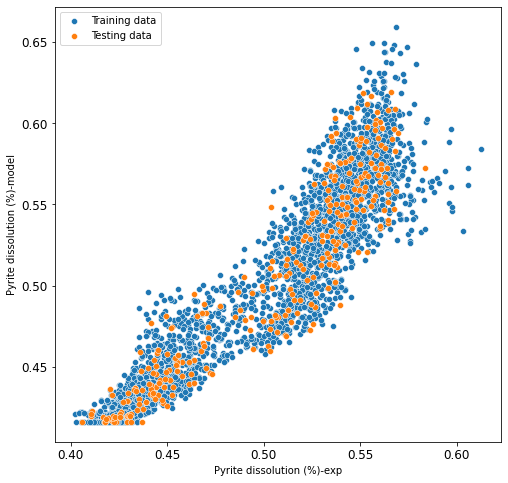

In [54]:
plt.figure(figsize=(8,8))
d=sns.scatterplot(x=ytr, y=y, legend='auto')
d=sns.scatterplot(x=yte, y=y_te,legend='auto')
d.legend(labels=["Training data","Testing data"])
d.set(xlabel='Pyrite dissolution (%)-exp', ylabel='Pyrite dissolution (%)-model')
d.tick_params(labelsize=12)